## STOCK PRICE PREDICTION

### Downloading Stock Data

In [90]:
import yfinance as yf       #retrieve stock data from Yahoo Finance
msft=yf.Ticker("MSFT")        #Ticker class allows you to access various data for a specific stock.
msft_hist=msft.history(period='max')

### Preparing Data for ML

In [91]:
msft_hist.head(5)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-03-13 00:00:00-05:00,0.054693,0.062736,0.054693,0.060055,1031788800,0.0,0.0
1986-03-14 00:00:00-05:00,0.060055,0.063272,0.060055,0.062199,308160000,0.0,0.0
1986-03-17 00:00:00-05:00,0.062199,0.063808,0.062199,0.063272,133171200,0.0,0.0
1986-03-18 00:00:00-05:00,0.063272,0.063808,0.061127,0.061663,67766400,0.0,0.0
1986-03-19 00:00:00-05:00,0.061663,0.062199,0.060055,0.060591,47894400,0.0,0.0


<AxesSubplot: xlabel='Date'>

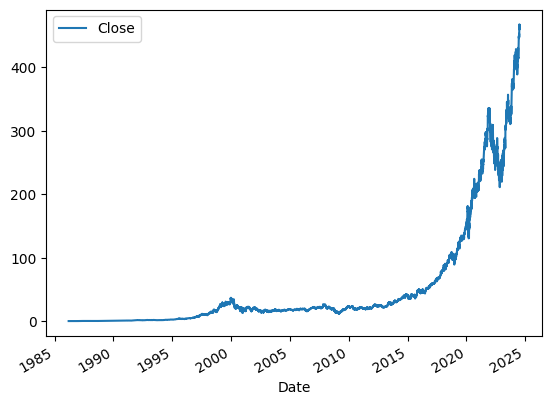

In [92]:
msft_hist.plot.line(y="Close", use_index=True)

In [93]:
data=msft_hist[["Close"]]
data
data=data.rename(columns={'Close':'Actual_Close'})
data["Target"]=msft_hist.rolling(2).apply(lambda x: x.iloc[1]>x.iloc[0])["Close"]

data["Target"].value_counts()

1.0    4892
0.0    4765
Name: Target, dtype: int64

In [94]:
data.head(5)

,Actual_Close,Target
Date,,
1986-03-13 00:00:00-05:00,0.060055,NaN
1986-03-14 00:00:00-05:00,0.062199,1.0
1986-03-17 00:00:00-05:00,0.063272,1.0
1986-03-18 00:00:00-05:00,0.061663,0.0
1986-03-19 00:00:00-05:00,0.060591,0.0


In [95]:
msft_prev=msft_hist.copy()
msft_prev=msft_prev.shift(1) 
#shifting so that the model does not predict data from the future but from the past

msft_prev.head(5)


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-03-13 00:00:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986-03-14 00:00:00-05:00,0.054693,0.062736,0.054693,0.060055,1.031789e+09,0.0,0.0
1986-03-17 00:00:00-05:00,0.060055,0.063272,0.060055,0.062199,3.081600e+08,0.0,0.0
1986-03-18 00:00:00-05:00,0.062199,0.063808,0.062199,0.063272,1.331712e+08,0.0,0.0
1986-03-19 00:00:00-05:00,0.063272,0.063808,0.061127,0.061663,6.776640e+07,0.0,0.0


In [96]:
predictors=["Close", "High", "Low", "Open", "Volume"]
data=data.join(msft_prev[predictors]).iloc[1:]
data.head(5)

,Actual_Close,Target,Close,High,Low,Open,Volume
Date,,,,,,,
1986-03-14 00:00:00-05:00,0.062199,1.0,0.060055,0.062736,0.054693,0.054693,1.031789e+09
1986-03-17 00:00:00-05:00,0.063272,1.0,0.062199,0.063272,0.060055,0.060055,3.081600e+08
1986-03-18 00:00:00-05:00,0.061663,0.0,0.063272,0.063808,0.062199,0.062199,1.331712e+08
1986-03-19 00:00:00-05:00,0.060591,0.0,0.061663,0.063808,0.061127,0.063272,6.776640e+07
1986-03-20 00:00:00-05:00,0.058982,0.0,0.060591,0.062199,0.060055,0.061663,4.789440e+07


### Training Machine Learning Model

In [97]:
from sklearn.ensemble import RandomForestClassifier   
#Because our data (target) is binary
#RF - series of individual decision tree models

model=RandomForestClassifier(n_estimators=100, min_samples_split=200, random_state=1)    
#train 100 decision trees and average their results to get our final result
#min_samples_split=200: avoid model overfitting

train=data.iloc[:-100]
test=data.iloc[-100:]

model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=200, random_state=1)

In [98]:
from sklearn.metrics import precision_score
#true positives/ (false positives + true positives)

preds=model.predict(test[predictors])

import pandas as pd
preds=pd.Series(preds,index=test.index)
preds

Date
2024-02-15 00:00:00-05:00    1.0
2024-02-16 00:00:00-05:00    1.0
2024-02-20 00:00:00-05:00    1.0
2024-02-21 00:00:00-05:00    1.0
2024-02-22 00:00:00-05:00    1.0
                            ... 
2024-07-03 00:00:00-04:00    1.0
2024-07-05 00:00:00-04:00    1.0
2024-07-08 00:00:00-04:00    1.0
2024-07-09 00:00:00-04:00    1.0
2024-07-10 00:00:00-04:00    1.0
Length: 100, dtype: float64

In [99]:
precision_score(test["Target"], preds)

0.5263157894736842

In [100]:
combined=pd.concat({"Target":test["Target"], "Predictions":preds}, axis=1)
combined

,Target,Predictions
Date,,
2024-02-15 00:00:00-05:00,0.0,1.0
2024-02-16 00:00:00-05:00,0.0,1.0
2024-02-20 00:00:00-05:00,0.0,1.0
2024-02-21 00:00:00-05:00,0.0,1.0
2024-02-22 00:00:00-05:00,1.0,1.0
...,...,...
2024-07-03 00:00:00-04:00,1.0,1.0
2024-07-05 00:00:00-04:00,1.0,1.0
2024-07-08 00:00:00-04:00,0.0,1.0


<AxesSubplot: xlabel='Date'>

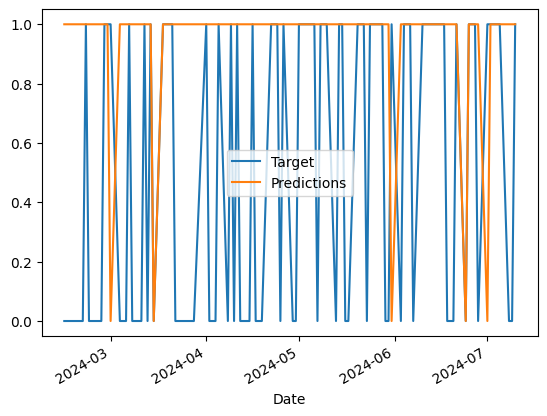

In [101]:
combined.plot()


### Creating a Backtesting Engine

In [112]:
start=1000
step=750

def backtest(data, model, predictors, strat=1000, step=750):
  predictions=[]
  for i in range(start, data.shape[0], step):
    train=data.iloc[0:i].copy()
    test=data.iloc[i:(i+step)].copy()

    model.fit(train[predictors], train["Target"])

    preds=model.predict_proba(test[predictors])[:,1]      #price will go up
    preds=pd.Series(preds,index=test.index)
    preds[preds>0.6]=1
    preds[preds<=0.6]=0

    combined=pd.concat({"Target":test["Target"], "Predictions":preds}, axis=1)
    combined

    predictions.append(combined)

  predictions= pd.concat(predictions)
  return predictions

In [110]:
# predictions["Predictions"].value_counts()

0.0    7962
1.0     695
Name: Predictions, dtype: int64

In [111]:
# precision_score(predictions["Target"], predictions["Predictions"])

0.5064748201438849

In [116]:
weekly_mean=data.rolling(7).mean()
quarterly_mean=data.rolling(90).mean()
annual_mean=data.rolling(356).mean()

weekly_trend=data.shift(1).rolling(7).mean()["Target"]

In [117]:
data["weekly_mean"] = weekly_mean["Close"] / data["Close"]
data["quarterly_mean"] = quarterly_mean["Close"] / data["Close"]
data["annual_mean"] = annual_mean["Close"] / data["Close"]

data["annual_weekly_mean"] = data["annual_mean"] / data["weekly_mean"]
data["annual_quarterly_mean"] = data["annual_mean"] / data["quarterly_mean"]
data["weekly_trend"] = weekly_trend

data["open_close_ratio"] = data["Open"] / data["Close"]
data["high_close_ratio"] = data["High"] / data["Close"]
data["low_close_ratio"] = data["Low"] / data["Close"]

In [118]:
full_predictors = predictors + ["weekly_mean", "quarterly_mean", "annual_mean", "annual_weekly_mean", "annual_quarterly_mean", "open_close_ratio", "high_close_ratio", "low_close_ratio", "weekly_trend"]
predictions = backtest(data.iloc[365:], model, full_predictors)

In [119]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5846645367412141

In [120]:
predictions["Predictions"].value_counts()

0.0    7979
1.0     313
Name: Predictions, dtype: int64